In [ ]:
pip install pandas matplotlib seaborn

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('MKT.csv')
df['total_investment'] = df['youtube'] + df['facebook'] + df['newspaper']
df['investment_return'] = df['sales'] - df['total_investment']

'''Como tenho os valores de investimento dividos por "plataformas",
quero saber o valor total do investimento.
Por tabelo, também vou querer saber o retorno do investimento,
visto que estou tendo gastos com ele.'''

In [ ]:
df.head()

,youtube,facebook,newspaper,sales,total_investment,investment_return
0,84.72,19.20,48.96,12.60,152.88,-140.28
1,351.48,33.96,51.84,25.68,437.28,-411.60
2,135.48,20.88,46.32,14.28,202.68,-188.40
3,116.64,1.80,36.00,11.52,154.44,-142.92
4,318.72,24.00,0.36,20.88,343.08,-322.20


In [ ]:
df.describe()

,youtube,facebook,newspaper,sales,total_investment,investment_return
count,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807,240.932632,-224.009825
std,102.449597,17.913532,24.902918,6.314608,112.167551,106.738011
min,0.840000,0.000000,0.360000,1.920000,25.680000,-491.760000
25%,91.080000,11.700000,13.740000,12.540000,146.820000,-319.140000
50%,179.760000,26.760000,31.080000,15.480000,248.400000,-227.640000
75%,262.980000,43.680000,50.880000,20.820000,337.740000,-132.840000
max,355.680000,59.520000,121.080000,32.400000,520.320000,-21.840000


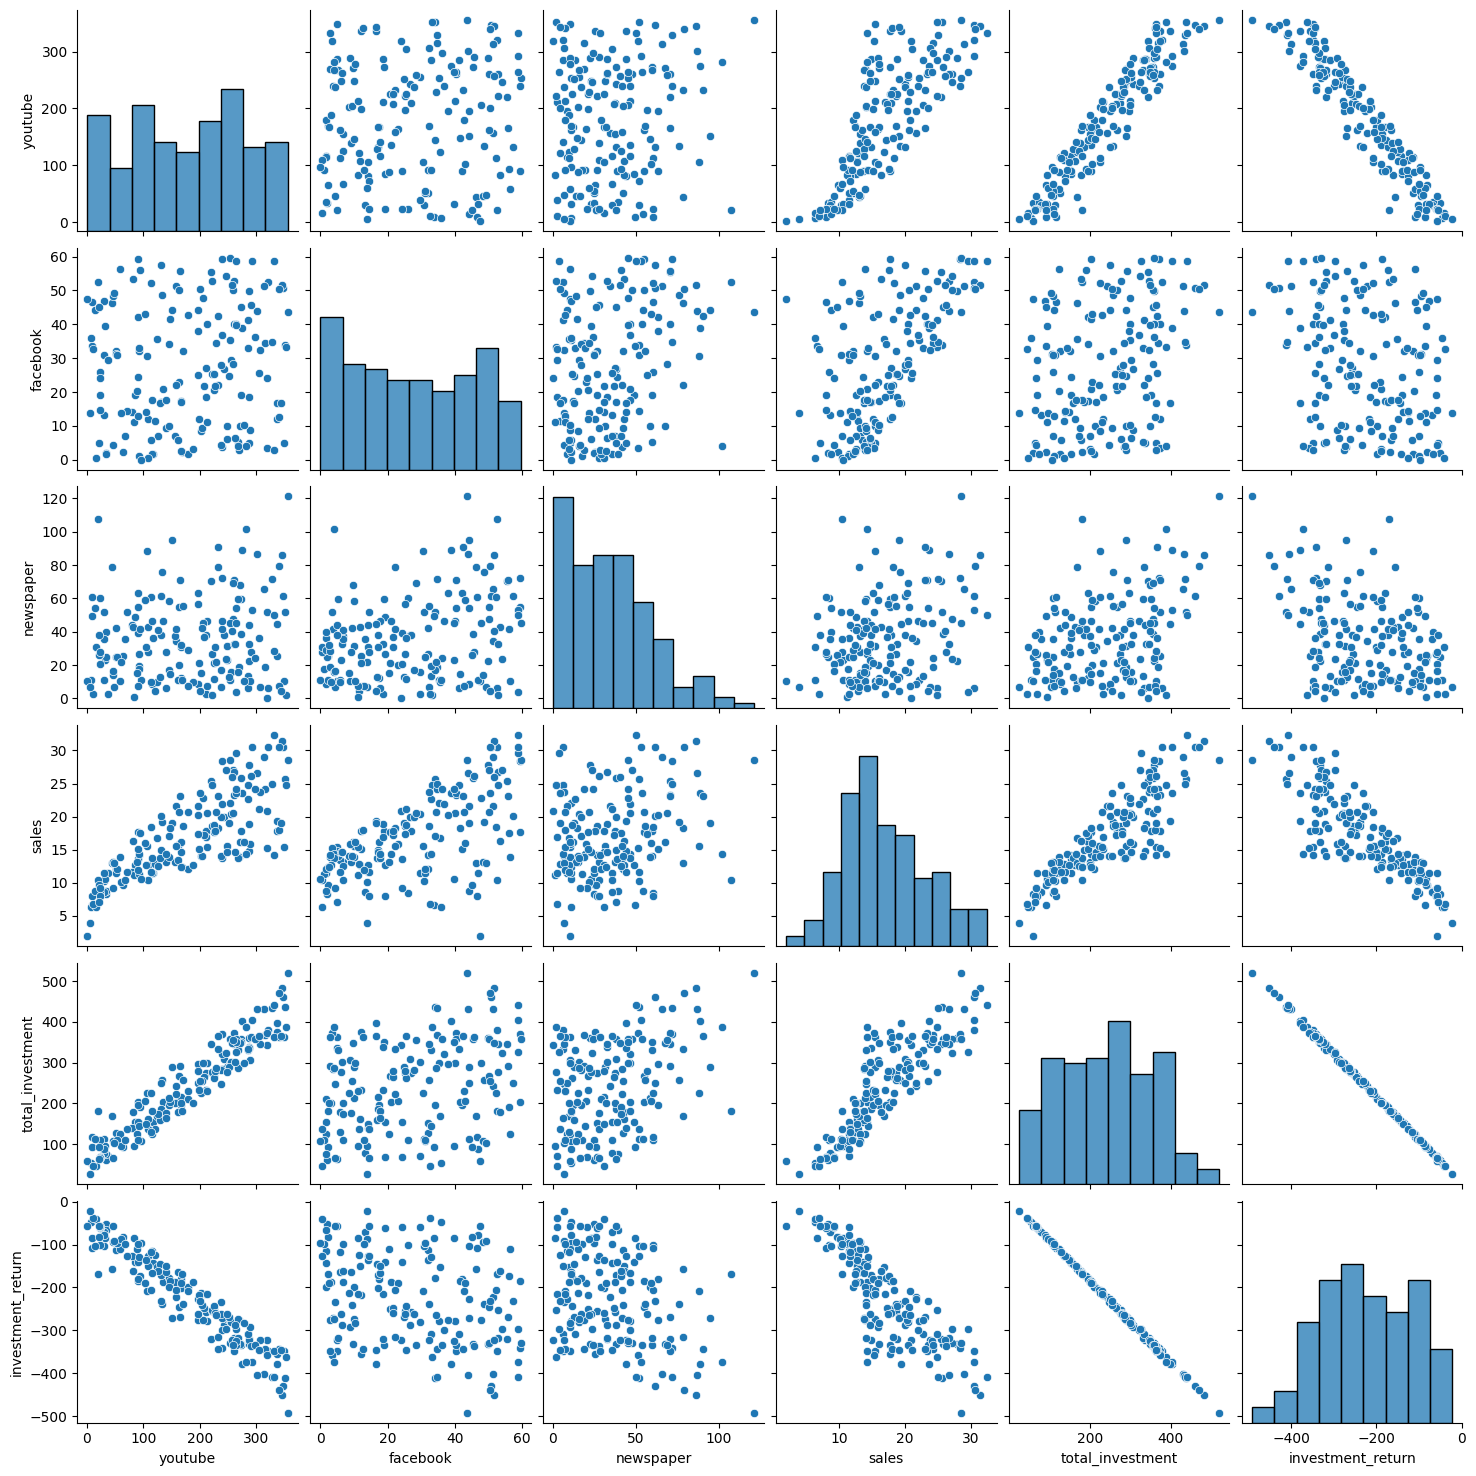

In [ ]:
sns.pairplot(df)

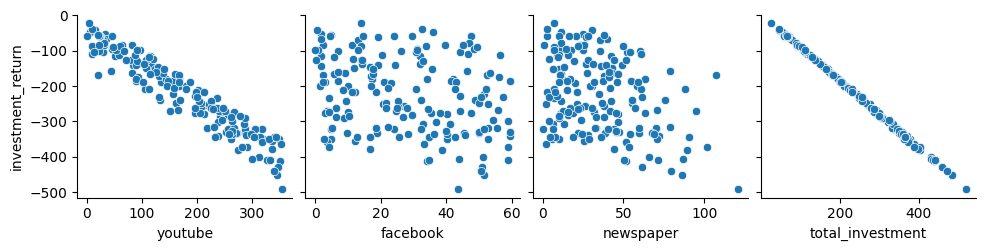

In [ ]:
sns.pairplot(df, x_vars=['youtube',
                         'facebook',
                         'newspaper',
                         'total_investment'],
             y_vars=['investment_return'])

'''Só no olhômetro, é obvio que quanto maior for o investimento,
menor o retorno.
Também é visível que o investimento no Youtube tem  um retorno bem
menor em relação às outras fontes.
Facebook tem uma distribuição mais homogênea e jornais têm um meio termo
entre YouTube e Facebook.

Porém, eles ainda continuam dando prejuízo quanto maior for o valor de investimento'''

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
'''
Aqui quero criar uma função para fazer multiplas análises
sem ter que repetir meu código multiplas vezes
'''

def analise(x, y, nomeAnalise):
  x_train, x_test, y_train, y_test =
  train_test_split(x, y, train_size = 0.7,
                   test_size = 0.3, random_state = 42)

  print(x_train.shape)
  print(x_test.shape)
  print(y_train.shape)
  print(y_test.shape)

  model = LinearRegression()
  model.fit(x_train, y_train)

  y_pred = model.predict(x_test)

  from sklearn.metrics import r2_score

  r = r2_score(y_test, y_pred)
  print("R2 Score:", r)

  c = [i for i in range(1, 53, 1)]

  fig = plt.figure()

  plt.plot(c, y_test, color="blue")
  plt.plot(c, y_pred, color="red")
  plt.xlabel("Investimento")
  plt.ylabel("Retorno")
  plt.title(nomeAnalise)
  plt.show()

In [ ]:
'''
Aqui é a mesma coisa, só que para a previsão
'''
def previsao(x, y, novo_investimento, tipoAnalise):
  x_train, x_test, y_train, y_test =
  train_test_split(x, y, train_size = 0.7,
                   test_size = 0.3, random_state = 42)

  model = LinearRegression()
  model.fit(x_train, y_train)

  # Converta o novo investimento em um DataFrame
  novo_investimento_df = pd.DataFrame([novo_investimento])

  # Converter variáveis categóricas em numéricas (se necessário)
  # ... (código para converter variáveis categóricas, se necessário)

  # Preveja o retorno de vendas para o novo investimento
  sales_prediction = model.predict(novo_investimento_df)

  print(tipoAnalise, "previsto:", sales_prediction[0])


(119, 1)
(52, 1)
(119,)
(52,)
R2 Score: 0.7580331012694259


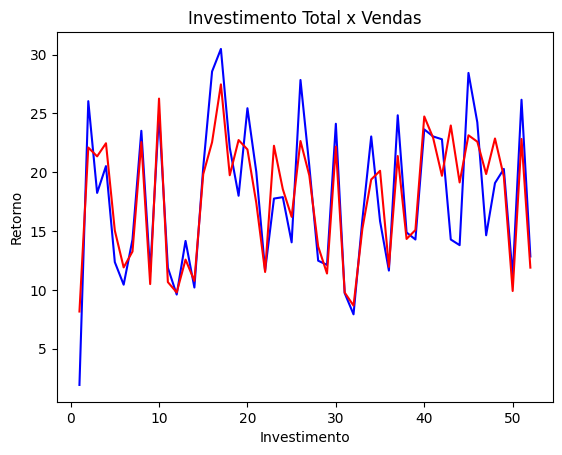

Ultimo total de vendas:  16.08
Total de vendas previsto: 22.177564419035225


In [ ]:
'''
Aqui eu estou fazendo uso de minhas funções de análise previsão.
O código está BEM mais limpo e mais organizado.
'''

investimento = df[["total_investment"]]
retorno = df["sales"]

analise(investimento, retorno , 'Investimento Total x Vendas')

print('Ultimo total de vendas: ', df["sales"].iloc[-1])

novo_investimento = {"total_investment": 350}
previsao(investimento, retorno, novo_investimento, "Total de vendas")

(119, 1)
(52, 1)
(119,)
(52,)
R2 Score: 0.9990998311974933


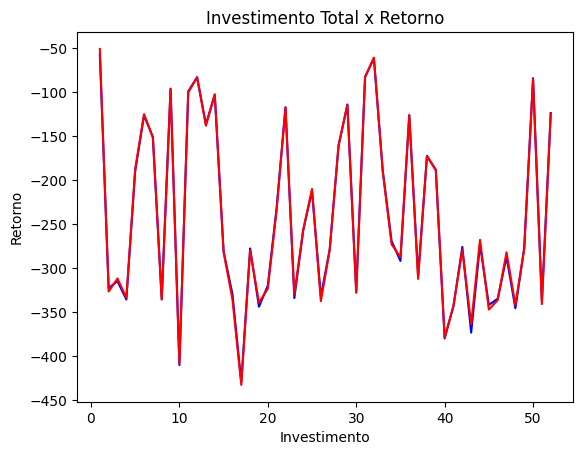

Ultimo retorno de vendas:  -283.2
Retorno de vendas previsto: -327.8224355809648


In [ ]:
retorno = df["investment_return"]

analise(investimento, retorno , 'Investimento Total x Retorno')
print('Ultimo retorno de vendas: ', df["investment_return"].iloc[-1])

novo_investimento = {"total_investment": 350}
previsao(investimento, retorno, novo_investimento, "Retorno de vendas")

In [ ]:
'''Tendo em vista que o R2 Score analisando
Investimento Total x Retorno é maior,
prefiro confiar mais nesse modelo.'''

In [ ]:
'''
Minha primeira intenção seria fazer outra análise comparando
Investimento x Retorno, só que excluindo o YouTube da equação
e vendo "no que dá".
Porém, como o valor de Sales não está distribuído, o resultado
tende a ser menos confiável porque eu não sei qual parte do Sales
vem do investimento do Youtube.

Portanto, a partir dessa análise EXTREMAMENTE rasa com uma base
não muito detalhada, a unica conclusão que consigo chegar é que
seria mais viável investir mais no Facebook e TALVEZ nos Jornais e
diminuir o investimento no YouTube.
'''
